In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import random
import seaborn as sns


In [2]:
# dataframes creation for both training and testing datasets 
chicago_df_1 = pd.read_csv('/Users/aika/Desktop/DL and ML Practical Tutorials - Package/Project 3/Chicago_Crimes_2005_to_2007.csv', error_bad_lines=False)
chicago_df_2 = pd.read_csv('/Users/aika/Desktop/DL and ML Practical Tutorials - Package/Project 3/Chicago_Crimes_2008_to_2011.csv', error_bad_lines=False)
chicago_df_3 = pd.read_csv('/Users/aika/Desktop/DL and ML Practical Tutorials - Package/Project 3/Chicago_Crimes_2012_to_2017.csv', error_bad_lines=False)



b'Skipping line 533719: expected 23 fields, saw 24\n'
b'Skipping line 1149094: expected 23 fields, saw 41\n'


In [3]:
chicago_df = pd.concat([chicago_df_1, chicago_df_2, chicago_df_3], ignore_index=False, axis=0)
chicago_df.head()

,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,0,4673626,HM274058,04/02/2006 01:00:00 PM,055XX N MANGO AVE,2825,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,False,...,45.0,11.0,26,1136872.0,1936499.0,2006,04/15/2016 08:55:02 AM,41.981913,-87.771996,"(41.981912692, -87.771996382)"
1,1,4673627,HM202199,02/26/2006 01:40:48 PM,065XX S RHODES AVE,2017,NARCOTICS,MANU/DELIVER:CRACK,SIDEWALK,True,...,20.0,42.0,18,1181027.0,1861693.0,2006,04/15/2016 08:55:02 AM,41.775733,-87.611920,"(41.775732538, -87.611919814)"
2,2,4673628,HM113861,01/08/2006 11:16:00 PM,013XX E 69TH ST,051A,ASSAULT,AGGRAVATED: HANDGUN,OTHER,False,...,5.0,69.0,04A,1186023.0,1859609.0,2006,04/15/2016 08:55:02 AM,41.769897,-87.593671,"(41.769897392, -87.593670899)"
3,4,4673629,HM274049,04/05/2006 06:45:00 PM,061XX W NEWPORT AVE,0460,BATTERY,SIMPLE,RESIDENCE,False,...,38.0,17.0,08B,1134772.0,1922299.0,2006,04/15/2016 08:55:02 AM,41.942984,-87.780057,"(41.942984005, -87.780056951)"
4,5,4673630,HM187120,02/17/2006 09:03:14 PM,037XX W 60TH ST,1811,NARCOTICS,POSS: CANNABIS 30GMS OR LESS,ALLEY,True,...,13.0,65.0,18,1152412.0,1864560.0,2006,04/15/2016 08:55:02 AM,41.784211,-87.716745,"(41.784210853, -87.71674491)"


<AxesSubplot:>

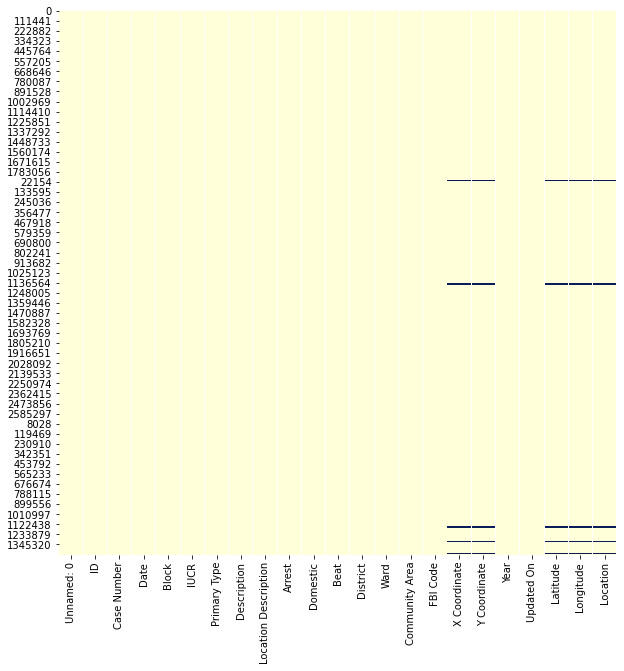

In [4]:
# Let's see how many null elements are contained in the data
plt.figure(figsize=(10,10))
sns.heatmap(chicago_df.isnull(), cbar = False, cmap = 'YlGnBu')
# black points are all the missing points

In [5]:
chicago_df.head()

,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,0,4673626,HM274058,04/02/2006 01:00:00 PM,055XX N MANGO AVE,2825,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,False,...,45.0,11.0,26,1136872.0,1936499.0,2006,04/15/2016 08:55:02 AM,41.981913,-87.771996,"(41.981912692, -87.771996382)"
1,1,4673627,HM202199,02/26/2006 01:40:48 PM,065XX S RHODES AVE,2017,NARCOTICS,MANU/DELIVER:CRACK,SIDEWALK,True,...,20.0,42.0,18,1181027.0,1861693.0,2006,04/15/2016 08:55:02 AM,41.775733,-87.611920,"(41.775732538, -87.611919814)"
2,2,4673628,HM113861,01/08/2006 11:16:00 PM,013XX E 69TH ST,051A,ASSAULT,AGGRAVATED: HANDGUN,OTHER,False,...,5.0,69.0,04A,1186023.0,1859609.0,2006,04/15/2016 08:55:02 AM,41.769897,-87.593671,"(41.769897392, -87.593670899)"
3,4,4673629,HM274049,04/05/2006 06:45:00 PM,061XX W NEWPORT AVE,0460,BATTERY,SIMPLE,RESIDENCE,False,...,38.0,17.0,08B,1134772.0,1922299.0,2006,04/15/2016 08:55:02 AM,41.942984,-87.780057,"(41.942984005, -87.780056951)"
4,5,4673630,HM187120,02/17/2006 09:03:14 PM,037XX W 60TH ST,1811,NARCOTICS,POSS: CANNABIS 30GMS OR LESS,ALLEY,True,...,13.0,65.0,18,1152412.0,1864560.0,2006,04/15/2016 08:55:02 AM,41.784211,-87.716745,"(41.784210853, -87.71674491)"


In [6]:
# Assembling a datetime by rearranging the dataframe column "Date". 

chicago_df.Date = pd.to_datetime(chicago_df.Date, format='%m/%d/%Y %I:%M:%S %p')

In [7]:
# setting the index to be the date 
chicago_df.index = pd.DatetimeIndex(chicago_df.Date)

In [8]:
chicago_df

,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
Date,,,,,,,,,,,,,,,,,,,,,
2006-04-02 13:00:00,0,4673626,HM274058,2006-04-02 13:00:00,055XX N MANGO AVE,2825,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,False,...,45.0,11.0,26,1136872.0,1936499.0,2006,04/15/2016 08:55:02 AM,41.981913,-87.771996,"(41.981912692, -87.771996382)"
2006-02-26 13:40:48,1,4673627,HM202199,2006-02-26 13:40:48,065XX S RHODES AVE,2017,NARCOTICS,MANU/DELIVER:CRACK,SIDEWALK,True,...,20.0,42.0,18,1181027.0,1861693.0,2006,04/15/2016 08:55:02 AM,41.775733,-87.611920,"(41.775732538, -87.611919814)"
2006-01-08 23:16:00,2,4673628,HM113861,2006-01-08 23:16:00,013XX E 69TH ST,051A,ASSAULT,AGGRAVATED: HANDGUN,OTHER,False,...,5.0,69.0,04A,1186023.0,1859609.0,2006,04/15/2016 08:55:02 AM,41.769897,-87.593671,"(41.769897392, -87.593670899)"
2006-04-05 18:45:00,4,4673629,HM274049,2006-04-05 18:45:00,061XX W NEWPORT AVE,0460,BATTERY,SIMPLE,RESIDENCE,False,...,38.0,17.0,08B,1134772.0,1922299.0,2006,04/15/2016 08:55:02 AM,41.942984,-87.780057,"(41.942984005, -87.780056951)"
2006-02-17 21:03:14,5,4673630,HM187120,2006-02-17 21:03:14,037XX W 60TH ST,1811,NARCOTICS,POSS: CANNABIS 30GMS OR LESS,ALLEY,True,...,13.0,65.0,18,1152412.0,1864560.0,2006,04/15/2016 08:55:02 AM,41.784211,-87.716745,"(41.784210853, -87.71674491)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-05-03 23:33:00,6250330,10508679,HZ250507,2016-05-03 23:33:00,026XX W 23RD PL,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,True,...,28.0,30.0,08B,1159105.0,1888300.0,2016,05/10/2016 03:56:50 PM,41.849222,-87.691556,"(41.849222028, -87.69155551)"
2016-05-03 23:30:00,6251089,10508680,HZ250491,2016-05-03 23:30:00,073XX S HARVARD AVE,1310,CRIMINAL DAMAGE,TO PROPERTY,APARTMENT,True,...,17.0,69.0,14,1175230.0,1856183.0,2016,05/10/2016 03:56:50 PM,41.760744,-87.633335,"(41.760743949, -87.63333531)"
2016-05-03 00:15:00,6251349,10508681,HZ250479,2016-05-03 00:15:00,024XX W 63RD ST,041A,BATTERY,AGGRAVATED: HANDGUN,SIDEWALK,False,...,15.0,66.0,04B,1161027.0,1862810.0,2016,05/10/2016 03:56:50 PM,41.779235,-87.685207,"(41.779234743, -87.685207125)"


In [9]:
# counting specific number of elements within specific column
chicago_df['Primary Type'].value_counts()

THEFT                                1245111
BATTERY                              1079178
CRIMINAL DAMAGE                       702702
NARCOTICS                             674831
BURGLARY                              369056
OTHER OFFENSE                         368169
ASSAULT                               360244
MOTOR VEHICLE THEFT                   271624
ROBBERY                               229467
DECEPTIVE PRACTICE                    225180
CRIMINAL TRESPASS                     171596
PROSTITUTION                           60735
WEAPONS VIOLATION                      60335
PUBLIC PEACE VIOLATION                 48403
OFFENSE INVOLVING CHILDREN             40260
CRIM SEXUAL ASSAULT                    22789
SEX OFFENSE                            20172
GAMBLING                               14755
INTERFERENCE WITH PUBLIC OFFICER       14009
LIQUOR LAW VIOLATION                   12129
ARSON                                   9269
HOMICIDE                                5879
KIDNAPPING

<AxesSubplot:xlabel='count', ylabel='Primary Type'>

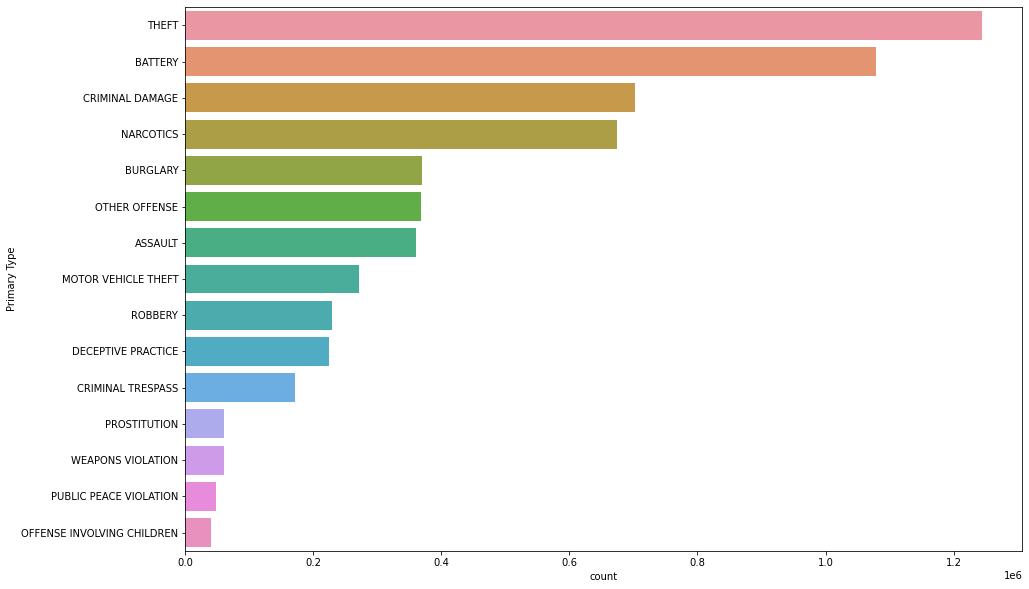

In [10]:
plt.figure(figsize = (15, 10))
sns.countplot(y= 'Primary Type', data = chicago_df, order = chicago_df['Primary Type'].value_counts().iloc[:15].index)

In [11]:
# frequency of occurence of crimes in each year
chicago_df.resample('Y').size()

Date
2005-12-31    455811
2006-12-31    794684
2007-12-31    621848
2008-12-31    852053
2009-12-31    783900
2010-12-31    700691
2011-12-31    352066
2012-12-31    335670
2013-12-31    306703
2014-12-31    274527
2015-12-31    262995
2016-12-31    265462
2017-12-31     11357
Freq: A-DEC, dtype: int64

Text(0, 0.5, 'Number of Crimes')

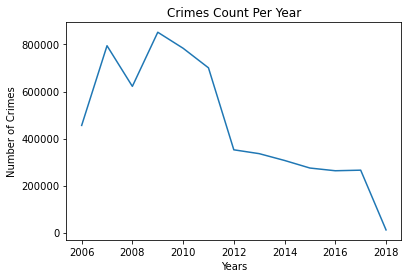

In [12]:
# Resample is a Convenience method for frequency conversion and resampling of time series.

plt.plot(chicago_df.resample('Y').size())
plt.title('Crimes Count Per Year')
plt.xlabel('Years')
plt.ylabel('Number of Crimes')
# as we can see in graph number of crimes decreasing over a years

Text(0, 0.5, 'Number of Crimes')

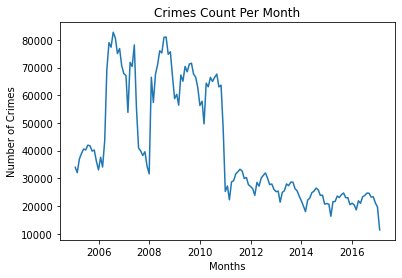

In [13]:
# Resample is a Convenience method for frequency conversion and resampling of time series.

plt.plot(chicago_df.resample('M').size())
plt.title('Crimes Count Per Month')
plt.xlabel('Months')
plt.ylabel('Number of Crimes')

In [14]:
chicago_prophet = chicago_df.resample('M').size().reset_index()
chicago_prophet

,Date,0
0,2005-01-31,33983
1,2005-02-28,32042
2,2005-03-31,36970
3,2005-04-30,38963
4,2005-05-31,40572
...,...,...
140,2016-09-30,23235
141,2016-10-31,23314
142,2016-11-30,21140
143,2016-12-31,19580


In [15]:
chicago_prophet.columns = ['Date', 'Crime Count']

In [16]:
chicago_prophet_df = pd.DataFrame(chicago_prophet)

In [17]:
chicago_prophet_df

,Date,Crime Count
0,2005-01-31,33983
1,2005-02-28,32042
2,2005-03-31,36970
3,2005-04-30,38963
4,2005-05-31,40572
...,...,...
140,2016-09-30,23235
141,2016-10-31,23314
142,2016-11-30,21140
143,2016-12-31,19580


In [18]:
# STEP #4: MAKE PREDICTIONS

In [19]:
chicago_prophet_df_final = chicago_prophet_df.rename(columns={'Date':'ds', 'Crime Count':'y'})

In [20]:
from fbprophet import Prophet

m = Prophet()
m.fit(chicago_prophet_df_final)

Importing plotly failed. Interactive plots will not work.
INFO:numexpr.utils:NumExpr defaulting to 4 threads.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [21]:
# Forcasting into the future in 365 days
future = m.make_future_dataframe(periods=365)
forecast = m.predict(future)

In [22]:
forecast
# creates trend, upper bound and lower bound basd on the crime count dataframe

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2005-01-31,60469.647981,39963.624165,71639.472300,60469.647981,60469.647981,-4975.708247,-4975.708247,-4975.708247,-4975.708247,-4975.708247,-4975.708247,0.0,0.0,0.0,55493.939734
1,2005-02-28,60339.063153,33329.619350,68976.843115,60339.063153,60339.063153,-9621.875889,-9621.875889,-9621.875889,-9621.875889,-9621.875889,-9621.875889,0.0,0.0,0.0,50717.187264
2,2005-03-31,60194.487093,41580.812346,75543.918236,60194.487093,60194.487093,-1316.121235,-1316.121235,-1316.121235,-1316.121235,-1316.121235,-1316.121235,0.0,0.0,0.0,58878.365858
3,2005-04-30,60054.574777,44713.972820,77125.381472,60054.574777,60054.574777,1152.227091,1152.227091,1152.227091,1152.227091,1152.227091,1152.227091,0.0,0.0,0.0,61206.801868
4,2005-05-31,59909.998717,48664.557271,82309.104405,59909.998717,59909.998717,5505.352549,5505.352549,5505.352549,5505.352549,5505.352549,5505.352549,0.0,0.0,0.0,65415.351267
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
505,2018-01-27,9946.266510,-11366.900045,21734.494901,9800.024783,10087.073256,-4303.833060,-4303.833060,-4303.833060,-4303.833060,-4303.833060,-4303.833060,0.0,0.0,0.0,5642.433450
506,2018-01-28,9933.009136,-11264.928905,21895.610033,9785.626288,10074.474938,-4442.268308,-4442.268308,-4442.268308,-4442.268308,-4442.268308,-4442.268308,0.0,0.0,0.0,5490.740828
507,2018-01-29,9919.751763,-13215.422842,23022.825733,9771.387287,10061.876619,-4592.938494,-4592.938494,-4592.938494,-4592.938494,-4592.938494,-4592.938494,0.0,0.0,0.0,5326.813269
508,2018-01-30,9906.494390,-11597.988529,22503.652125,9758.119175,10049.278301,-4755.641260,-4755.641260,-4755.641260,-4755.641260,-4755.641260,-4755.641260,0.0,0.0,0.0,5150.853131


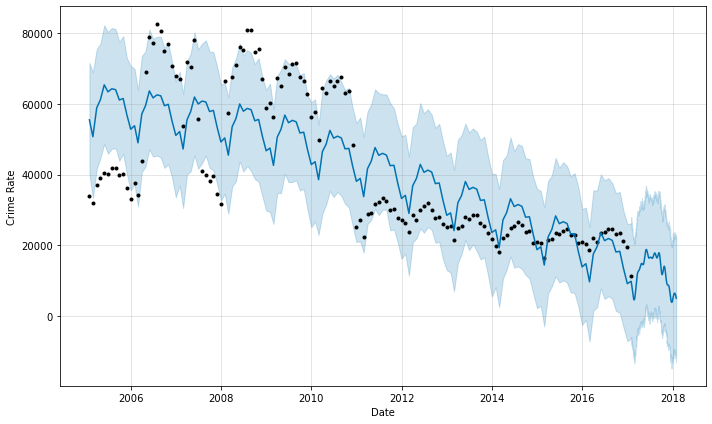

In [23]:
figure = m.plot(forecast, xlabel='Date', ylabel='Crime Rate')

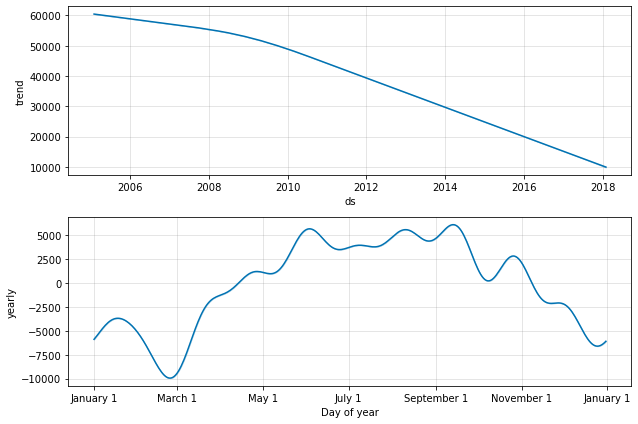

In [24]:
figure3 = m.plot_components(forecast)
# in first figure the trend is go down
# second graph seasonality shows that crime rate is low in the beginning of the year and goes up in July